# Overview of the proposed fingerprints

In [23]:
# RDKit
from rdkit import Chem
# Custom modules 
from Modules.FingerPrints.ParsingFunctions import get_sub_dict
from Modules.FingerPrints.GeneratingFunctions import FirstDegreeFP,SecondDegreeFP
from Modules.FingerPrints.KernelFP import KernelFPGenerator

## Fingerprint Computation Workflow

The process of computing molecular fingerprints involves two main steps:

1. **Parsing the molecular graph**  
   The molecular structure is first transformed into a suitable intermediate representation using the `ParsingFunctions` module.

2. **Generating the fingerprint**  
   The parsed representation is then converted into a numerical fingerprint using the `GeneratingFunctions` module.

These steps, along with **reindexing the molecule** to match the atom numbering of the Maximum Common Substructure (**MCS**), are conveniently integrated into the `KernelFPGenerator` class, which automates the full pipeline from SMILES input to fingerprint output.
## Parsing and Generating Functions

The fingerprint computation relies on two main types of functions: **parsing functions** and **generating functions**.

### 1. Parsing Functions
Parsing functions process the molecular graph to extract the information needed for fingerprint computation.  
Currently, only one parsing function is implemented: **`get_sub_dict`**.  

This function returns a dictionary mapping each atom of the **MCS skeleton** to the list of atom labels in its substituents.  
From this dictionary, the **empirical formula** of each substituent can be deduced and later used in the fingerprint calculation.

The `ParsingFunctions` module also provides the deep customization — changes here affect how the molecular graph itself is processed.  
This allows for advanced extensions, such as **stereochemistry-aware fingerprints**.

---

### 2. Generating Functions
Once the molecule is parsed, generating functions create the actual fingerprint vector.  
Currently, two generating functions are available:

- **`FirstDegreeFP`** — produces a **20-bit fingerprint** without interaction bits.
- **`SecondDegreeFP`** — extends the 20-bit fingerprint with **72 interaction bits**, resulting in a richer representation.

The `GeneratingFunctions` module represents the **first degree of customization** of fingerprints.  
It is straightforward to write your own generating functions that reuse the existing `get_sub_dict` output.

Interaction bits can be easily customized by modifying the `INTERACTING_PAIRS` constant in `GeneratingFunctions.py`.

---

**Customization Summary:**
- *`GeneratingFunctions`* → Modify how features are computed from parsed data.  
- *`ParsingFunctions`* → Modify how the molecular graph is interpreted before fingerprinting.


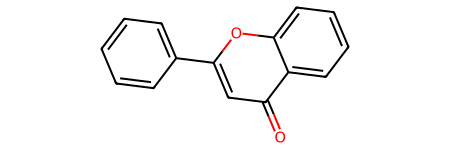

In [24]:
# Define the MCS as a SMILES string.
# We use flavone here as the core scaffold common to all molecules in this analysis.
mcs_smiles = 'C1=CC=C(C=C1)C2=CC(=O)C3=CC=CC=C3O2'

# Convert the MCS SMILES to an RDKit Mol object.
mcs_mol = Chem.MolFromSmiles(mcs_smiles)

# Display the molecule (in Jupyter this will render a 2D structure).
mcs_mol

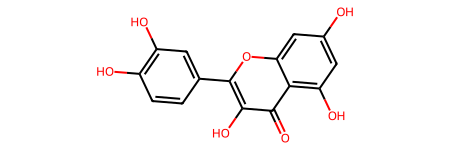

In [25]:
# SMILES string of quercetin, a flavonoid molecule with multiple hydroxyl groups.
test_smiles = 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

# Convert to RDKit Mol object for visualization and processing.
test_mol = Chem.MolFromSmiles(test_smiles)

# Display the test molecule structure.
test_mol


In [26]:
# FPgen1d: Uses first-degree fingerprint generator that captures substituent presence only.
FPgen1d = KernelFPGenerator(
    generating_function=FirstDegreeFP,
    parsing_function=get_sub_dict,
    mcs_smiles=mcs_smiles
)

# FPgen2d: Uses second-degree fingerprint generator that includes pairwise substituent interactions.
FPgen2d = KernelFPGenerator(
    generating_function=SecondDegreeFP,
    parsing_function=get_sub_dict,
    mcs_smiles=mcs_smiles
)


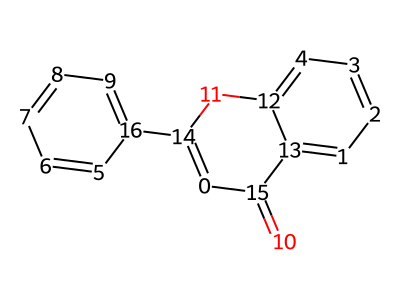

In [27]:
# Display the core structure with atom indices shown for reference.
# Useful to understand atom ordering and substituent positions.
FPgen1d.display_mcs()

In [28]:
# Produces a 20-bit binary vector indicating presence of oxygen-only and carbon-containing substituents
# at each core atom position, without considering interactions.
fp_1d = FPgen1d.generate(test_smiles)

# Show the generated fingerprint vector.
fp_1d

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [29]:
# Cell 6: Generate second-degree fingerprint for the test molecule

# Extends the first-degree fingerprint by adding 72 bits encoding pairwise interactions
# between substituents at selected pairs of core positions.
fp_2d = FPgen2d.generate(test_smiles)

# Show the extended fingerprint vector with interaction bits.
fp_2d

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])